In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [304]:
N = 101
xi = np.linspace(0,1,N)
h = 1/(N-1)
W0 = np.sqrt(1 - xi)
g = 1
v0 = W0[N-2]**2*W0[N-3]/g/2/h
t = 10**(-5)

Text(0, 0.5, 'xi')

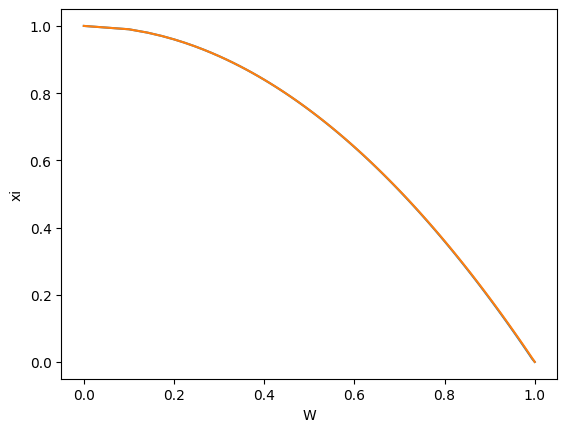

In [305]:
v_prev = v0.copy()
W_prev = W0.copy()
eps = 1
gs = []
ts = []

for j in range(100000):
    # gs.append(g)
    # ts.append(j*t)
    while(eps > 10**(-2)):
        a1 = np.zeros(N-1)
        a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3
        
        a0 = np.ones(N)
        a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3
        
        a_1 = np.zeros(N-1)
        a_1[:-1] = v_prev/g*xi[1:-1]/2/h + 1/(g*h)**2*((W_prev[:-2] + W_prev[1:-1])/2)**3
        
        f = np.zeros(N)
        f[0] = 1
        f[-1] = 0
        f[1:-1] = W_prev[1:-1]/t
        k = [a_1,a0, a1]
        offset = [-1,0,1]
        A = diags(k,offset, format = 'csr')
        W = spsolve(A, f)
        eps = np.sqrt(((W - W_prev)**2).mean())
        W_prev = W.copy()
    v_prev = W_prev[N-2]**2*W_prev[N-3]/g/2/h
    g = g + v_prev*t

plt.figure()
plt.plot(W_prev, xi)
plt.plot(W0, xi)
plt.xlabel('W')
plt.ylabel('xi')